## Load Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## Cleaning Data

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
df.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [7]:
# Normalize the values

df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
#Narrow down to cols with string values
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [12]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [13]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print('Unique count: ',df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Unique count:  48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
Unique count:  914

year
[2011 2012 2013 1992 1993]
Unique count:  28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Unique count:  10

engine_hp
[335. 300. 230. 320. 172.]
Unique count:  356

engine_cylinders
[ 6.  4.  5.  8. 12.]
Unique count:  9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Unique count:  5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Unique count:  4

number_of_doors
[ 2.  4.  3. nan]
Unique count:  3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
Unique count:  71

vehicle_size
['compact' 'midsize' 'large']
Unique count:  3

vehicle_style
['coupe' 'convertible' 'sedan' 'w

### Distribution of price

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

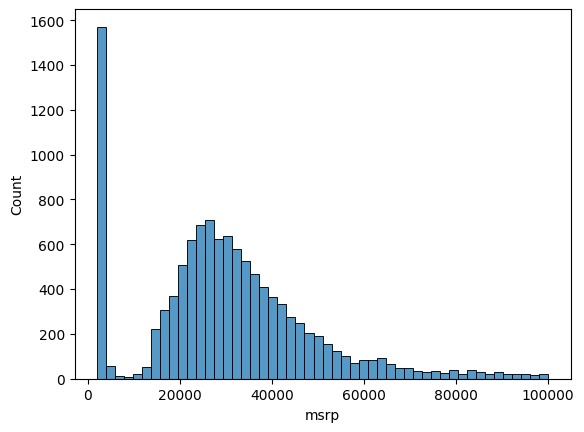

In [15]:
sns.histplot(df.msrp[df.msrp < 100000],bins=50)
#bins -> Number of bars we have

# --> this is a long tailed distribution

In [16]:
"""
- The long tail distribution isn't good for training the model, hence we'll resort to logarithmic scale
- log scale will give errors if we start from 0, hence you can start from 1 or use np.log1p([<range>])
"""
np.log1p([0,1,10,1000,10000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478,  9.21044037,
       11.51293546])

In [17]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

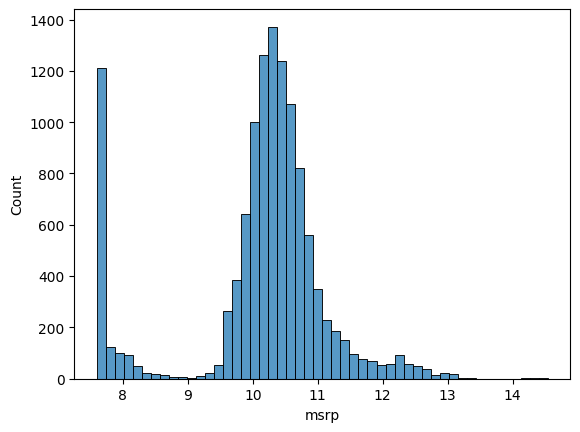

In [18]:
sns.histplot(price_logs,bins=50)

### Missing Values

In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation Framework
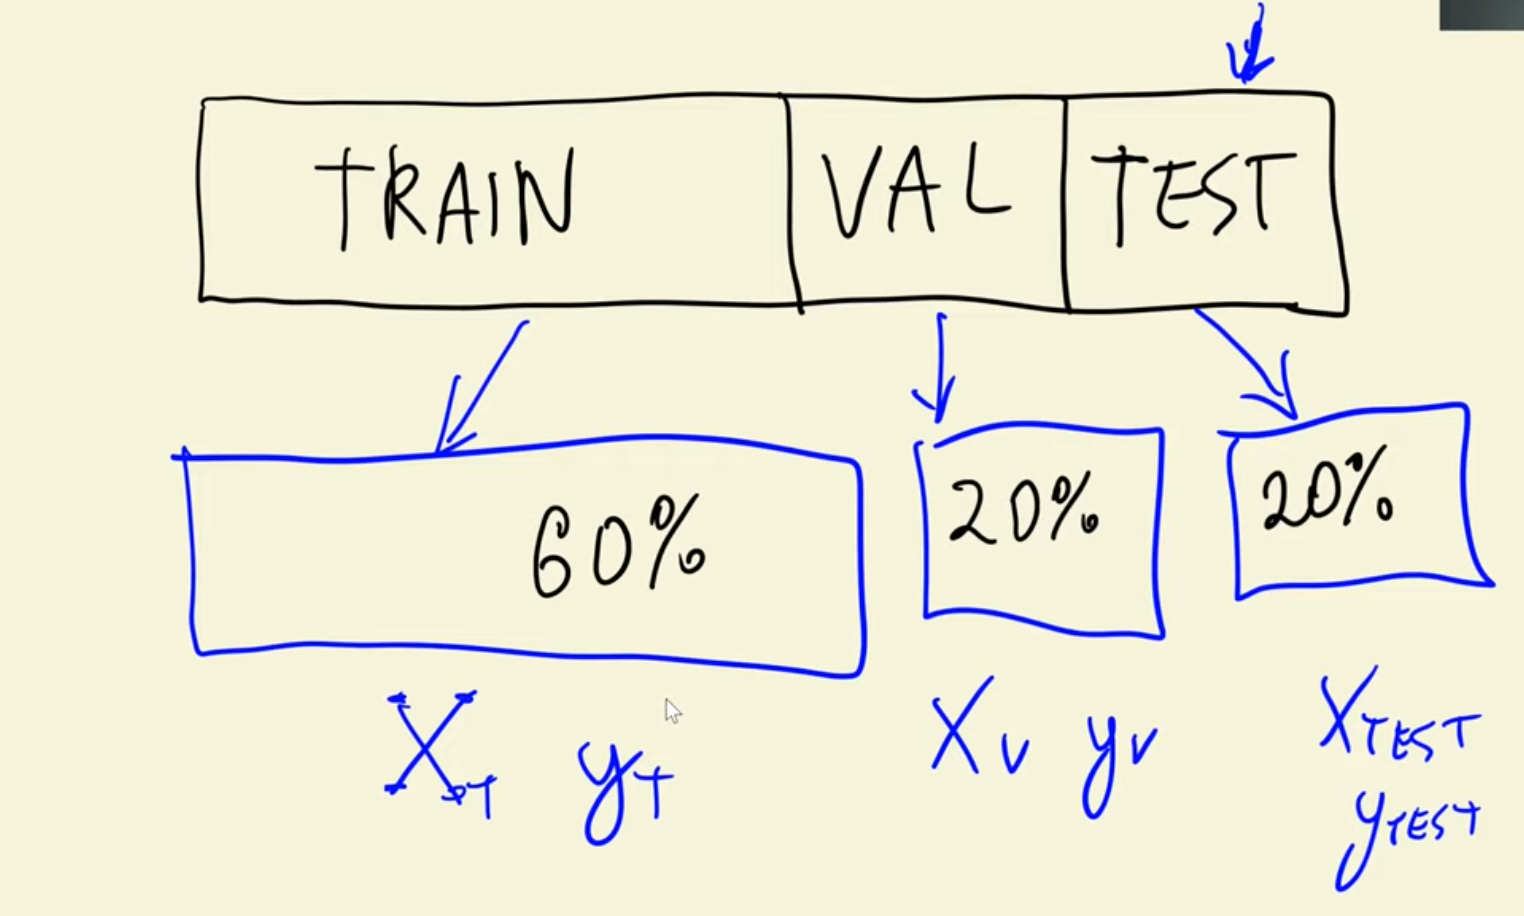

In [20]:
n = len(df)
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = n - (n_val+n_test)

In [21]:
n_val,n_test,n_train

(2382, 2382, 7150)

In [22]:
n,(n_val +n_test + n_train)

(11914, 11914)

In [23]:
df.iloc[[0,1,2,3]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450


In [24]:
df.iloc[:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


#### To partition the data, we use the iloc
- We need to shuffle the index to ensure there is the distribution of car categories throught the dataset
```python
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
```

In [25]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [26]:
np.random.seed(2)
np.random.shuffle(idx)

In [27]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [28]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [29]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [30]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [31]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


In [32]:
len(df_train),len(df_val),len(df_test)

(7150, 2382, 2382)

In [33]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [34]:
# mrsp log values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [35]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [36]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear Regression
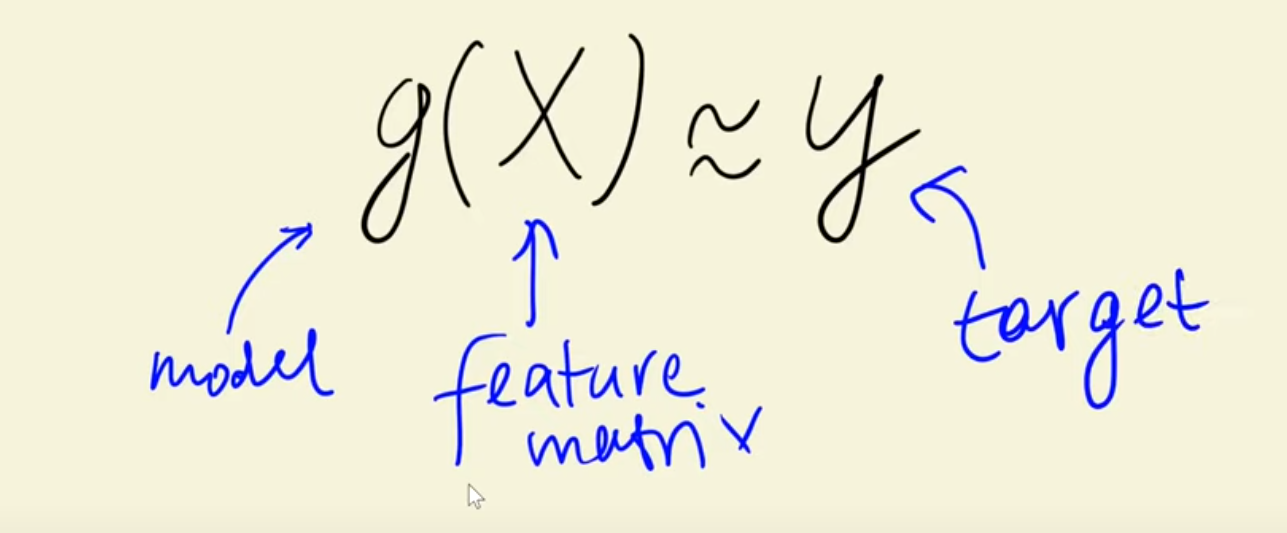
- g - Linear regression
- y - price
### Linear regression representation
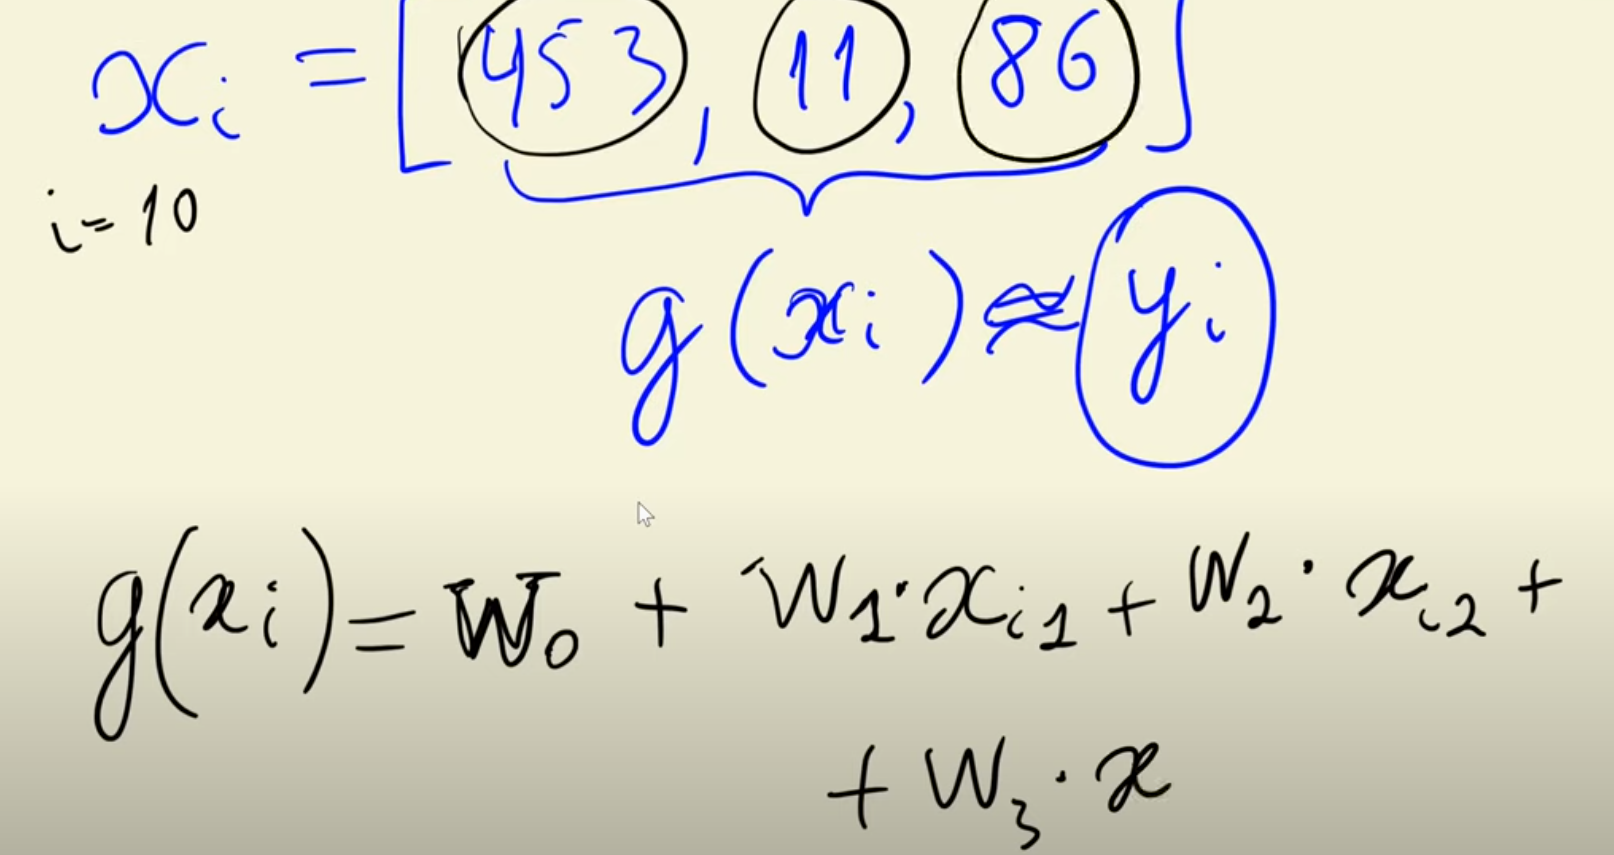

#### Supposing we pick a subset of the data
```python
df_train.iloc[10]
```
```txt
make                                 mazda
model                                    3
year                                  2016
engine_fuel_type          regular_unleaded
engine_hp                            184.0
engine_cylinders                       4.0
transmission_type                automatic
driven_wheels            front_wheel_drive
number_of_doors                        4.0
market_category      hatchback,performance
vehicle_size                       compact
vehicle_style                4dr_hatchback
highway_mpg                             37
city_mpg                                27
popularity                             586
Name: 388, dtype: object
```
- Pick `engine_hp`,`city_mpg`,`popularity` - [184,27,586]

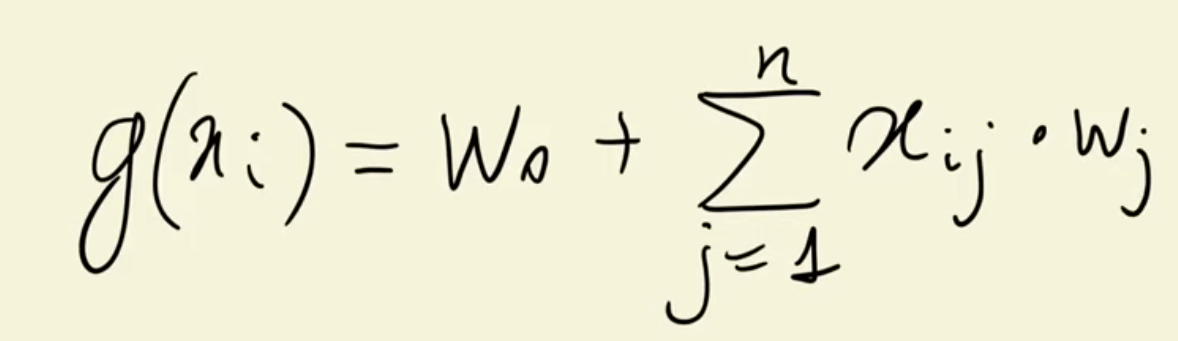


In [37]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

In [38]:
xi = [184,27,586]

In [39]:
w0 = 0
w = np.ones(3)
w

array([1., 1., 1.])

In [40]:
def linear_regression(xi):
    n = len(xi)
    prediction = w0

    for j in range(n):
        prediction = prediction + (w[j]*xi[j])
    return prediction

In [41]:
int(linear_regression(xi))

797

In [42]:
# Supposing we have the following
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [43]:
linear_regression(xi)

12.312

In [44]:
# Price Conversion
np.expm1(12.312)

np.float64(222347.2221101062)

## Linear Regression Vector Form

In [45]:
def dot_product(xi,w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + (w[j]*xi[j])
    return res

In [46]:
def linear_regression(xi):
    return w0+dot_product(xi,w)

In [47]:
# combining the w0 and making the code neater
w_new = [w0]+w
w_new

[7.17, 0.01, 0.04, 0.002]

In [48]:
x_new = [1]+xi

In [49]:
# Then editing the linewr regression function
def linear_regression(xi):
    return dot_product(xi,w_new)

In [50]:
linear_regression(x_new)

12.312

In [51]:
np.expm1(linear_regression(x_new))

np.float64(222347.2221101062)

In [52]:
# Multi feature array
x1 = [1,148,24,1385]
x2 = [1,100,21,2031]
x10 = [1,453,11,86]

In [53]:
X = np.array([x1,x2,x10])
X

array([[   1,  148,   24, 1385],
       [   1,  100,   21, 2031],
       [   1,  453,   11,   86]])

In [54]:
def linear_regression():
    return X.dot(w_new)

In [55]:
linear_regression()

array([12.38 , 13.072, 12.312])

## Training a linear regression model
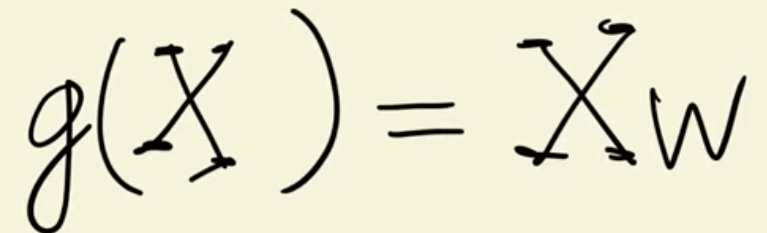
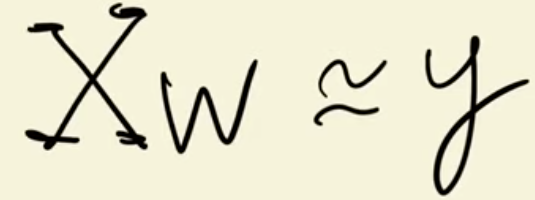
### Finding w
We learn the weights from data: we use the target variable y to find such w that
combines the features of X in the best possible way. “Best possible” in the case of linear
regression means that it minimizes the error between the predictions g(X) and the
actual target y.
We have multiple ways to do that. We will use normal equation, which is the simplest
method to implement. The weight vector w can be computed with the following
formula:

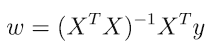

- X<sup>T</sup> is the transpose of X. In NumPy, it’s X.T.
- X<sup>T</sup>X is a matrix–matrix multiplication, which we can do with the dot method
from NumPy: X.T.dot(X).
- X<sup>–1</sup> is the inverse of X. We can use np.linalg.inv function to calculate the
inverse.

In [56]:
X = np.array([[148,24,1385],
 [100,21,2031],
 [342,32,1800],
 [321,20,2144],
 [122,19,1432],
 [211,29,90],
])
X

array([[ 148,   24, 1385],
       [ 100,   21, 2031],
       [ 342,   32, 1800],
       [ 321,   20, 2144],
       [ 122,   19, 1432],
       [ 211,   29,   90]])

In [57]:
XTX = X.T.dot(X)
XTX

array([[  311314,    31453,  1905598],
       [   31453,     3643,   206189],
       [ 1905598,   206189, 15938646]])

In [58]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.77233807e-05, -1.93262838e-04, -8.14432251e-07],
       [-1.93262838e-04,  2.37221206e-03, -7.58174528e-06],
       [-8.14432251e-07, -7.58174528e-06,  2.58193384e-07]])

In [59]:
XTX_inv.dot(XTX).round(1)

array([[ 1., -0., -0.],
       [ 0.,  1.,  0.],
       [ 0., -0.,  1.]])

In [60]:
# create random values for y
np.random.seed(2)
y = np.random.randint(100,25000,size=(6))
y

array([23820,  2675,  6737, 11898, 18998,  1199])

w = (X<sup>T</sup> X)<sup>-1</sup> X<sup>T</sup> y

In [61]:
w = XTX_inv.dot(X.T).dot(y)
w

array([-23.4851353 , 307.06872884,   5.32113052])

In [62]:
X.shape

(6, 3)

In [63]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1.])

In [64]:
list(np.column_stack([ones,X]))

[array([1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03]),
 array([1.000e+00, 1.000e+02, 2.100e+01, 2.031e+03]),
 array([1.00e+00, 3.42e+02, 3.20e+01, 1.80e+03]),
 array([1.000e+00, 3.210e+02, 2.000e+01, 2.144e+03]),
 array([1.000e+00, 1.220e+02, 1.900e+01, 1.432e+03]),
 array([  1., 211.,  29.,  90.])]

In [65]:
X = np.column_stack([ones,X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.000e+02, 2.100e+01, 2.031e+03],
       [1.000e+00, 3.420e+02, 3.200e+01, 1.800e+03],
       [1.000e+00, 3.210e+02, 2.000e+01, 2.144e+03],
       [1.000e+00, 1.220e+02, 1.900e+01, 1.432e+03],
       [1.000e+00, 2.110e+02, 2.900e+01, 9.000e+01]])

In [66]:
XTX = X.T.dot(X)
XTX

array([[6.0000000e+00, 1.2440000e+03, 1.4500000e+02, 8.8820000e+03],
       [1.2440000e+03, 3.1131400e+05, 3.1453000e+04, 1.9055980e+06],
       [1.4500000e+02, 3.1453000e+04, 3.6430000e+03, 2.0618900e+05],
       [8.8820000e+03, 1.9055980e+06, 2.0618900e+05, 1.5938646e+07]])

In [67]:
XTX_inv = np.linalg.inv(XTX)

In [68]:
# To bypass the singularity matrix error
# XTX_inv = np.linalg.pinv(XTX)

In [69]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.74080284e+04, -2.40799724e+00, -6.85395607e+02,  3.66667551e-01])

In [70]:
w0 = w_full[0]
w = w_full[1:]

In [71]:
w0,w

(np.float64(27408.028402446478),
 array([-2.40799724e+00, -6.85395607e+02,  3.66667551e-01]))

#### Linear regression function

In [72]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [73]:
train_linear_regression(X,y)

LinAlgError: Singular matrix

## Car price baseline model

In [74]:
list(df_train.columns)

['make',
 'model',
 'year',
 'engine_fuel_type',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'driven_wheels',
 'number_of_doors',
 'market_category',
 'vehicle_size',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [75]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

In [76]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2735,148.0,4.0,33,24,1385
6720,132.0,4.0,32,25,2031
5878,148.0,4.0,37,28,640
11190,90.0,4.0,18,16,873
4554,385.0,8.0,21,15,5657
...,...,...,...,...,...
434,300.0,6.0,31,20,3916
1902,210.0,4.0,30,24,873
9334,285.0,6.0,22,17,549
5284,563.0,12.0,21,13,86


In [77]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [78]:
# Fill nulls with 0
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [79]:
X_train = df_train[base].fillna(0).values

In [80]:
X_train, y_train

(array([[ 148.,    4.,   33.,   24., 1385.],
        [ 132.,    4.,   32.,   25., 2031.],
        [ 148.,    4.,   37.,   28.,  640.],
        ...,
        [ 285.,    6.,   22.,   17.,  549.],
        [ 563.,   12.,   21.,   13.,   86.],
        [ 200.,    4.,   31.,   22.,  873.]]),
 array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
        12.62248099, 10.54061978]))

In [81]:
w0,w = train_linear_regression(X_train,y_train)

In [82]:
w0,w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

#### Predictions
y_pred = w0 + X_train.dot(w)

In [83]:
# Predictions
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<Axes: ylabel='Count'>

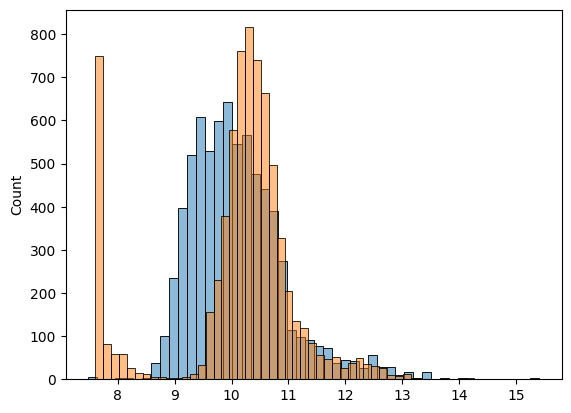

In [84]:
## How close the prediction is
sns.histplot(y_pred,bins=50,alpha=0.5) # Predicted price
sns.histplot(y_train,bins=50,alpha=0.5) # Actual price


## RMSE (ROOT MEAN SQUARE ERROR)
Looking at plots and comparing the distributions of the actual target variable with the
predictions is a good way to evaluate quality, but we cannot do this every time we change
something in the model. Instead, we need to use a metric that quantifies the quality of
the model. We can use many metrics to evaluate how well a regression model behaves.
The most commonly used one is root mean squared error — **RMSE** for short

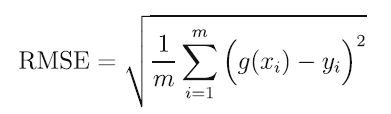

This is broken down into

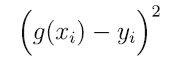
This is the difference between the prediction we make for the observation and the
actual target value for that observation

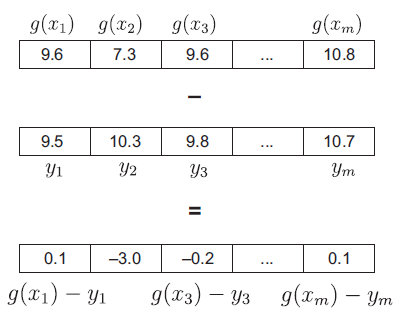

Then we use the square of the difference, which gives a lot more weight to larger differences.
If we predict 9.5, for example, and the actual value is 9.6, the difference is
0.1, so its square is 0.01, which is quite small. But if we predict 7.3, and the actual value
is 10.3, the difference is 3, and the square of the difference is 9

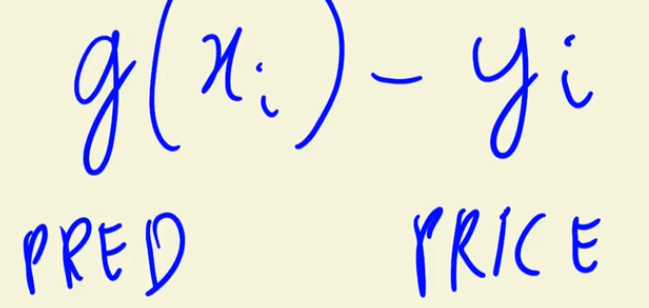


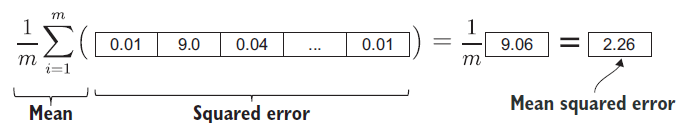

Final 

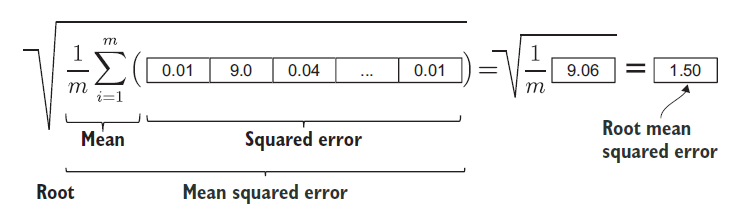

```python
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)
```

In [85]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [86]:
rmse(y_train,y_pred)

np.float64(0.7554192603920132)

## Validating the Model

In [87]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
X_train = df_train[base].fillna(0).values
w0,w = train_linear_regression(X_train,y_train)
y_pred = w0+X_train.dot(w)

In [88]:
def prepare_x(df):
    X = df[base].fillna(0).values
    return X    

In [89]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)
y_pred = w0+X_train.dot(w)

In [90]:
rmse(y_train,y_pred)

np.float64(0.7554192603920132)

Validation

In [91]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.761653099130156)

## Simple feature Engineering
Add the **Year** feature to see its effect on price prediction

In [92]:
 df.year.max() - df.year

0         6
1         6
2         6
3         6
4         6
         ..
11909     5
11910     5
11911     5
11912     4
11913    11
Name: year, Length: 11914, dtype: int64

In [93]:
def prepare_x(df):
    df = df.copy()
    #  Add manufacture year to the feature set

    df['age'] = df.year.max() - df.year
    features = base.copy()
    features.append('age')
    
    X = df[features].fillna(0).values
    return X    

In [94]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

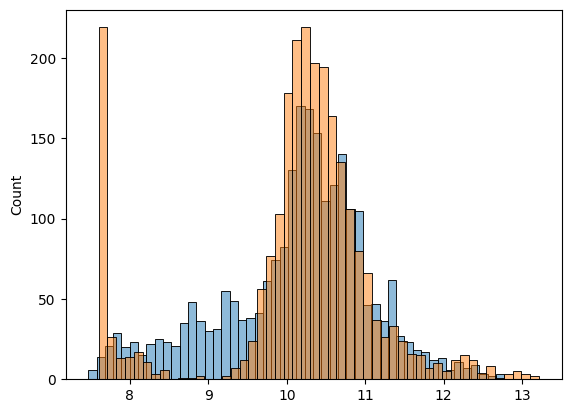

In [95]:
# View improvement
sns.histplot(y_pred,bins=50,alpha=0.5) # Predicted price
sns.histplot(y_val,bins=50,alpha=0.5) # Actual price

## Categorical Variables
- String in nature // Objects in nature

- Are represented by binary values


In [96]:
df_train.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

In [97]:
# Categorixal question in light -> Number of doors

for v in [2,3,4]:
    df_train['num_of_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

/tmp/ipykernel_5284/1712953130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_of_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
/tmp/ipykernel_5284/1712953130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_of_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
/tmp/ipykernel_5284/1712953130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [98]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_of_doors_2,num_of_doors_3,num_of_doors_4
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [99]:
def prepare_x(df):
    df = df.copy()
    #  Add manufacture year to the feature set

    df['age'] = df.year.max() - df.year
    features = base.copy()
    features.append('age')
    
    for v in [2,3,4]:
        df['num_of_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors_%s' % v)
        
    X = df[features].fillna(0).values
    return X    

In [100]:
prepare_x(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [101]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.515799564150169)

Compared to previous based in feature_set improvements -> np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

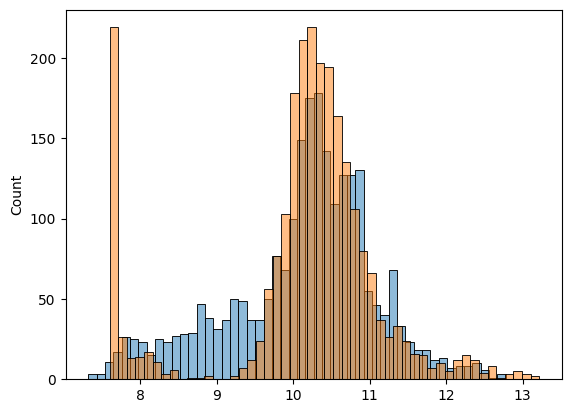

In [102]:
# View improvement
sns.histplot(y_pred,bins=50,alpha=0.5) # Predicted price
sns.histplot(y_val,bins=50,alpha=0.5) # Actual price

We can further dig into the categorical data -> Car make

In [103]:
df_train.make.value_counts()

make
chevrolet        667
ford             519
volkswagen       489
toyota           452
dodge            367
nissan           328
gmc              313
mazda            263
cadillac         249
honda            247
suzuki           210
mercedes-benz    208
bmw              202
infiniti         195
audi             192
hyundai          177
volvo            165
acura            155
subaru           154
kia              135
lexus            134
pontiac          125
mitsubishi       122
buick            121
chrysler         120
oldsmobile       102
land_rover        89
porsche           85
lincoln           82
saab              72
aston_martin      58
plymouth          48
bentley           45
ferrari           43
fiat              40
maserati          38
scion             36
lamborghini       31
lotus             16
rolls-royce       13
tesla             13
maybach           11
hummer             9
genesis            3
spyker             3
bugatti            2
mclaren            1
alfa_rom

In [104]:
categorical_values = [
    'make',
    'engine_fuel_type',
    'transmission_type',
    'driven_wheels',
    'market_category',
    'vehicle_size',
    'vehicle_style'
]

In [105]:
categories = {}

for c in categorical_values:
    categories[c] = list(df[c].value_counts().head().index)

In [106]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [107]:
def prepare_x(df):
    df = df.copy()
    #  Add manufacture year to the feature set

    df['age'] = df.year.max() - df.year
    features = base.copy()
    features.append('age')
    
    for v in [2,3,4]:
        df['num_of_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors_%s' % v)
    for c,values in categories.items():
        for v in values:
            df['%s_%s'%(c,v)] = (df[c]==v).astype('int')
            features.append('%s_%s'%(c,v))
        
    X = df[features].fillna(0).values
    return X    

In [108]:
prepare_x(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   0.,   0.,   0.]])

In [109]:
w0

np.float64(10.659085118454128)

In [110]:
w

array([ 3.71362023e-03,  7.55896758e-02, -3.94226970e-03,  1.05656089e-02,
       -4.55063701e-05, -9.45102320e-02, -1.26327322e+00, -1.47267350e+00,
       -1.30655848e+00])

In [111]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val,y_pred)

np.float64(23.019020704791835)

## Regularization

In [112]:
XTX = [
    [1,2,2],
    [2,1,1],
    [2,1,1]
]

In [113]:
XTX = np.array(XTX)
XTX

array([[1, 2, 2],
       [2, 1, 1],
       [2, 1, 1]])

In [114]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [ ]:
# Instead, we can do this
np.eye(3)

In [115]:
XTX = XTX + 0.01*np.eye(3)
XTX

array([[1.01, 2.  , 2.  ],
       [2.  , 1.01, 1.  ],
       [2.  , 1.  , 1.01]])

In [116]:
np.linalg.inv(XTX)

array([[ -0.33668906,   0.33501399,   0.33501399],
       [  0.33501399,  49.91540897, -50.08459103],
       [  0.33501399, -50.08459103,  49.91540897]])

In [117]:
def train_linear_regression_regularized(X,y,r=0.1):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [118]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression_regularized(X_train,y_train)

X_val = prepare_x(df_val)
y_pred = w0+X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.4565692763007501)

## Tuning the model

In [119]:
for r in [0.0,0.000001,0.00001,0.0001,0.001,0.01,1,10]:
    
    X_train = prepare_x(df_train)
    
    w0,w = train_linear_regression_regularized(X_train,y_train,r)
    
    X_val = prepare_x(df_val)
    y_pred = w0+X_val.dot(w)
    
    score = rmse(y_val,y_pred)
    print(r,w0,score)

0.0 4011091003551887.0 23.019020704791835
1e-06 187.8839690767719 0.4565172637906095
1e-05 6.178192055025445 0.45651702823445617
0.0001 6.317246071243372 0.4565170654323052
0.001 6.285636717989048 0.45651750867781377
0.01 6.2766071476973995 0.45652199012897743
1 5.634896668066369 0.45722043179930605
10 4.283980108968471 0.4701456932099909


In [120]:
r = 0.001
X_train = prepare_x(df_train)

w0,w = train_linear_regression_regularized(X_train,y_train,r=r)

X_val = prepare_x(df_val)
y_pred = w0+X_val.dot(w)

score = rmse(y_val,y_pred)
score

np.float64(0.45651750867781377)

## Using Model

In [123]:
df_full_train = pd.concat([df_train,df_val])

In [125]:
df_full_train = df_full_train.reset_index(drop=True)

In [126]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9532 entries, 0 to 9531
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               9532 non-null   object 
 1   model              9532 non-null   object 
 2   year               9532 non-null   int64  
 3   engine_fuel_type   9531 non-null   object 
 4   engine_hp          9476 non-null   float64
 5   engine_cylinders   9511 non-null   float64
 6   transmission_type  9532 non-null   object 
 7   driven_wheels      9532 non-null   object 
 8   number_of_doors    9526 non-null   float64
 9   market_category    6520 non-null   object 
 10  vehicle_size       9532 non-null   object 
 11  vehicle_style      9532 non-null   object 
 12  highway_mpg        9532 non-null   int64  
 13  city_mpg           9532 non-null   int64  
 14  popularity         9532 non-null   int64  
 15  num_of_doors_2     7150 non-null   float64
 16  num_of_doors_3     7150 

In [127]:
X_full_train = prepare_x(df_full_train)

In [128]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [130]:
y_full_train = np.concatenate([y_train,y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [131]:
w0,w = train_linear_regression_regularized(X_full_train,y_full_train,r=0.001)

In [132]:
w

array([ 1.52506332e-03,  1.18188703e-01, -6.66105494e-03, -5.33413785e-03,
       -4.87603208e-05, -9.69091838e-02, -7.92620449e-01, -8.90861655e-01,
       -6.35100382e-01, -4.14339224e-02,  1.75560743e-01, -5.78063598e-04,
       -1.00563877e-01, -9.27549641e-02, -4.66859195e-01,  7.98658894e-02,
       -3.16047745e-01, -5.51981714e-01, -7.89526802e-02,  1.09397462e+00,
        9.18667079e-01,  1.14824449e+00,  2.65138017e+00,  5.08603719e-01,
        1.62979575e+00,  1.53049981e+00,  1.61767854e+00,  1.54567793e+00,
       -9.70559706e-02,  3.73062128e-02, -5.81767490e-02, -2.35940871e-02,
       -1.19357192e-02,  2.18895260e+00,  2.07458270e+00,  2.05916686e+00,
       -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
       -1.58817038e-01])

In [133]:
w0

np.float64(6.322830302349775)

In [134]:
#Test model

X_test = prepare_x(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
score

np.float64(0.4517749310621406)

Test

In [139]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [140]:
df_car_sample = pd.DataFrame([car])
df_car_sample

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [142]:
x_car_sample = prepare_x(df_car_sample)
x_car_sample

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [143]:
y_pred = w0 + x_car_sample.dot(w)
y_pred

array([10.65647007])

Predicted price


In [144]:
np.expm1(y_pred)

array([42465.46853564])

Original Price

In [146]:
np.expm1(y_test[20])

np.float64(35000.00000000001)